In [53]:
import import_ipynb
import time
import matplotlib.pyplot as plt
import random
from glob import glob

In [54]:
# importation des bibliothèques basiques
from pathlib import Path
import sys
import os
from IPython.display import display
import pandas as pd

# Ajout du répertoire racine du projet au PYTHONPATH pour tous les imports
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Ensuite importer les modules nécessaires
import src.features.Augmentation.select_folders as select_folders
import src.features.Augmentation.Sampling as sampling
import src.features.Traitement_Data.C_traitement as C_traitement

In [55]:
target_count = 4999
# Récupère le chemin absolu du dossier courant du projet (là où se trouve ce notebook)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

In [73]:
All_dir = C_traitement.Get_All_Paths_2()
#print("Dossiers disponibles :", All_dir)
selected_dirs =[]
selected_dirs_output = []
for Data_class  in All_dir:
    print()
    print(f"Classe : {Data_class}")

    # Input directory
    Class_Path = All_dir[Data_class]["img"]
    print(f"Chemin : {Class_Path}")
    selected_dirs.append(Class_Path)

    # Output directory
    dsize = (256,256) # TODO rendre dynamique
    Categorie = f"{Data_class}"
    output_dir = os.path.join(project_root, "data", "processed",f"{dsize[0]}x{dsize[1]}", f"{Categorie}","Augmented")
    print("Chemin de sortie utilisé :", output_dir)
    selected_dirs_output.append(output_dir)

    # Applique l'undersampling
    logs = sampling.apply_undersampling(Class_Path, target_count, output_dir)
    for line in logs:
        print(line)   


Classe : covid
Chemin : C:\Users\Léna\Documents\A_Repos\DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID/images
Chemin de sortie utilisé : c:\Users\Léna\Documents\A_Repos\DS_COVID\data\processed\256x256\covid\Augmented
Recherche dans : C:\Users\Léna\Documents\A_Repos\DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID/images
Images trouvées : 3616
✅ Undersampling terminé pour C:\Users\Léna\Documents\A_Repos\DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID/images → c:\Users\Léna\Documents\A_Repos\DS_COVID\data\processed\256x256\covid\Augmented

Classe : normal
Chemin : C:\Users\Léna\Documents\A_Repos\DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal/images
Chemin de sortie utilisé : c:\Users\Léna\Documents\A_Repos\DS_COVID\data\processed\256x256\normal\Augmented
Recherche dans : C:\Users\Léna\Documents\A_Repos\DS_COVID/data/raw/COVID-19_Radiography_Dataset/CO

KeyboardInterrupt: 


Exploration du dossier : C:\Users\Léna\Documents\A_Repos\DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID/images


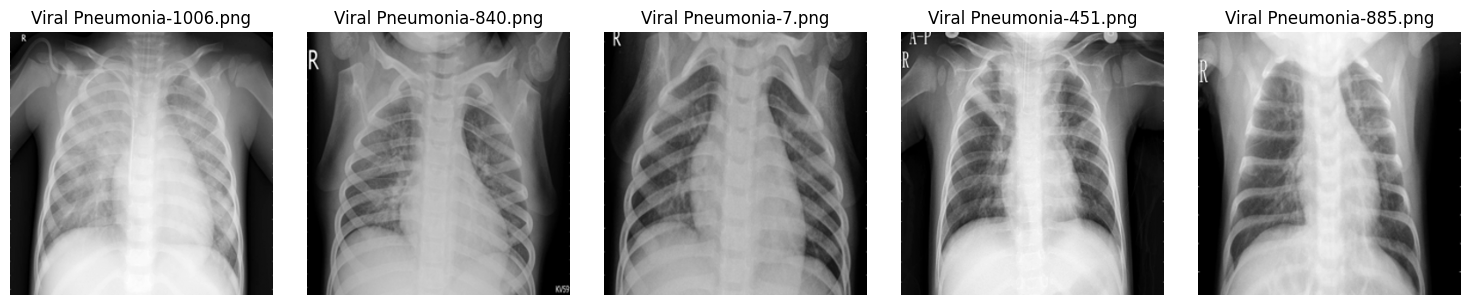


Exploration du dossier : C:\Users\Léna\Documents\A_Repos\DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal/images


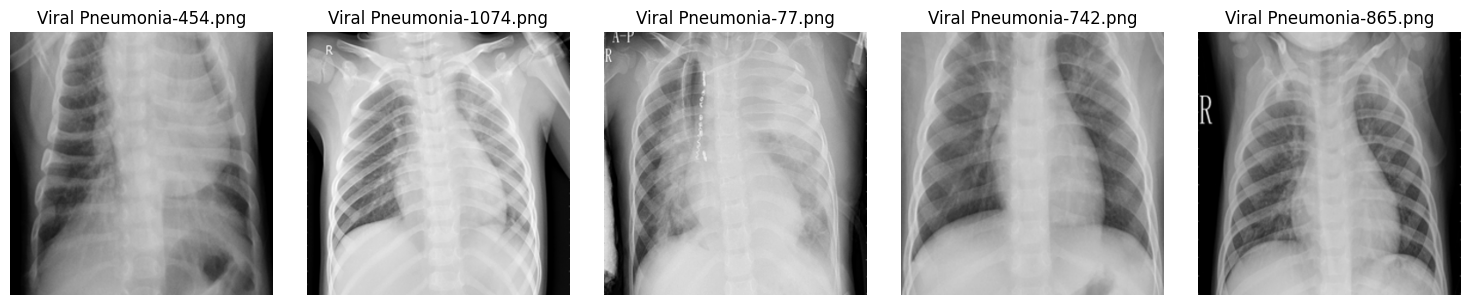


Exploration du dossier : C:\Users\Léna\Documents\A_Repos\DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Lung_Opacity/images


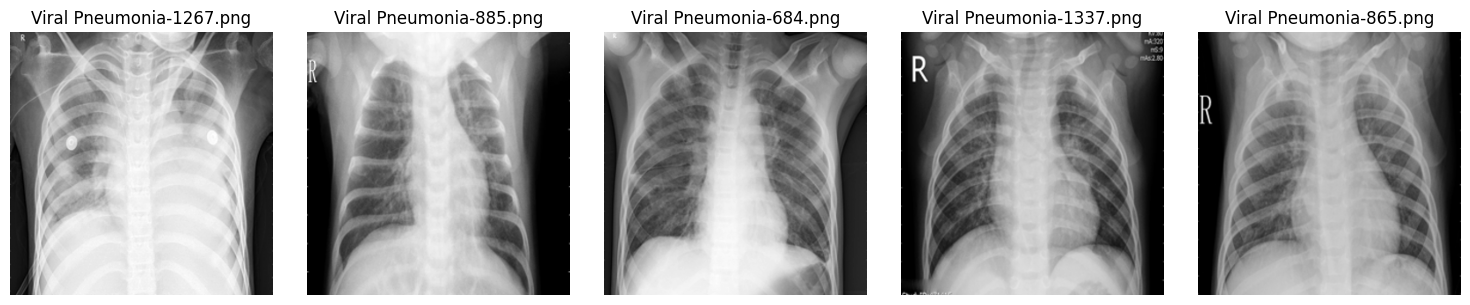


Exploration du dossier : C:\Users\Léna\Documents\A_Repos\DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/images


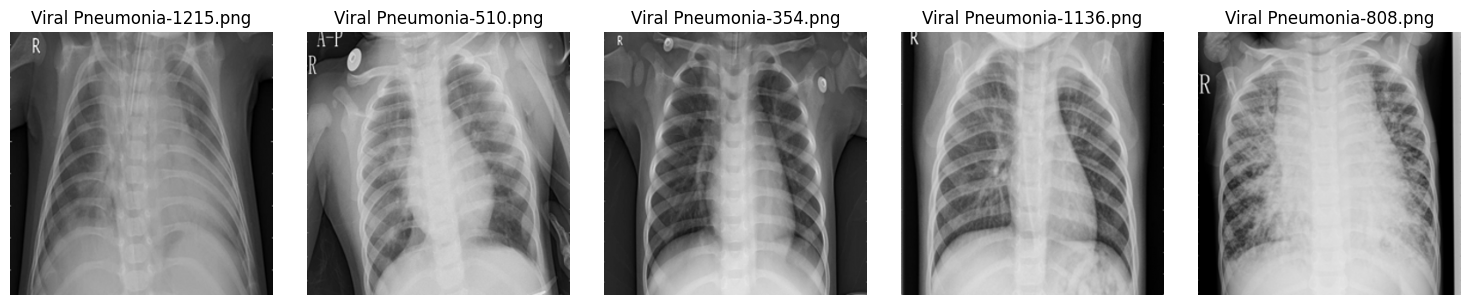

In [ ]:
def explore_directory(data_dir):
    """Affiche quelques images du dossier de sortie pour vérification."""

    print()
    print(f"Exploration du dossier : {data_dir}")

    images = glob(os.path.join(output_dir, '*.png'))
    sample_images = random.sample(images, min(5, len(images)))

    fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 3))
    if len(sample_images) == 1:
        axes = [axes]
    for ax, img_path in zip(axes, sample_images):
        img = plt.imread(img_path)
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(os.path.basename(img_path))
    plt.tight_layout()
    plt.show()

# Choisir le dossier à explorer

explore_directory(selected_dirs[0])
explore_directory(selected_dirs_output[0])

explore_directory(selected_dirs[1])
explore_directory(selected_dirs_output[1])

explore_directory(selected_dirs[2])
explore_directory(selected_dirs_output[2])

explore_directory(selected_dirs[3])
explore_directory(selected_dirs_output[3])